In [1]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## The data

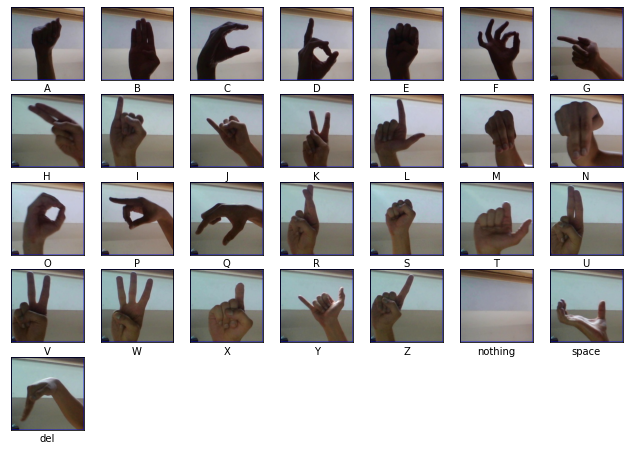

In [2]:
train_dir = 'asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

## Loading

In [3]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
Loading: 722.261378288269


## Network

In [4]:
classes = 29
batch = 64
epochs = 5
learning_rate = 0.001

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  start = time()
  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

## Configuration

Epoch 1/5
1102/1102 [==============================] - 304s 276ms/step - loss: 0.6029 - accuracy: 0.8177 - val_loss: 0.0758 - val_accuracy: 0.9793
Epoch 2/5
1102/1102 [==============================] - 315s 286ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.0358 - val_accuracy: 0.9904
Epoch 3/5
1102/1102 [==============================] - 316s 287ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 4/5
1102/1102 [==============================] - 318s 288ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0359 - val_accuracy: 0.9883
Epoch 5/5
1102/1102 [==============================] - 312s 283ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0439 - val_accuracy: 0.9838
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_______________________________________________

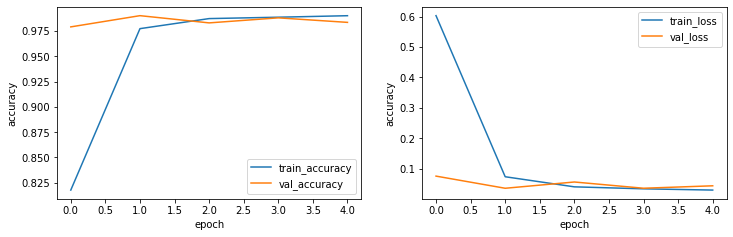

272/272 [==============================] - 12s 43ms/step - loss: 0.0479 - accuracy: 0.9826

Train time:  1567.8806223869324
Test accuracy: 0.9826436638832092
Test loss: 0.047942351549863815
Test time:  11.684486865997314


In [5]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)

In [10]:
model.save_weights('weights.h5')

In [11]:
# Load weights of a pre-trained model
model.load_weights('weights.h5')

In [24]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/A'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/A/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(0)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[0, 0, 13, 13, 15, 15, 4]
[0, 0, 0, 0, 0, 0, 0]


0.2857142857142857

In [25]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/B'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/B/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(1)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[1, 13, 1, 1, 15, 7, 15]
[1, 1, 1, 1, 1, 1, 1]


0.42857142857142855

In [23]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/C'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/C/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(2)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[2, 2, 2, 2, 18, 18, 2]
[2, 2, 2, 2, 2, 2, 2]


0.7142857142857143

In [27]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/D'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/D/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(3)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[3, 12, 9, 3, 15, 2, 16]
[3, 3, 3, 3, 3, 3, 3]


0.2857142857142857

In [29]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/del'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/del/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(4)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[4, 4, 4, 18, 18, 18, 18]
[4, 4, 4, 4, 4, 4, 4]


0.42857142857142855

In [30]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/E'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/E/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(5)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[5, 13, 13, 13, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5]


0.14285714285714285

In [31]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/F'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/F/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(6)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[6, 6, 12, 12, 18, 18, 2]
[6, 6, 6, 6, 6, 6, 6]


0.2857142857142857

In [32]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/G'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/G/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(7)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[7, 8, 8, 17, 17, 8, 8]
[7, 7, 7, 7, 7, 7, 7]


0.14285714285714285

In [33]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/H'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/H/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(8)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[8, 17, 8, 14, 17, 17, 17]
[8, 8, 8, 8, 8, 8, 8]


0.2857142857142857

In [34]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/I'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/I/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(9)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[9, 9, 9, 13, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9]


0.42857142857142855

In [35]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/J'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/J/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(10)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[10, 10, 10, 10, 10, 10, 4]
[10, 10, 10, 10, 10, 10, 10]


0.8571428571428571

In [36]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/K'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/K/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(11)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[11, 11, 11, 11, 10, 21, 8]
[11, 11, 11, 11, 11, 11, 11]


0.5714285714285714

In [37]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/L'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/L/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(12)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12]


1.0

In [38]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/M'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/M/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(13)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[13, 13, 13, 13, 14, 4, 4]
[13, 13, 13, 13, 13, 13, 13]


0.5714285714285714

In [39]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/N'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/N/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(14)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[14, 13, 13, 13, 14, 14, 4]
[14, 14, 14, 14, 14, 14, 14]


0.42857142857142855

In [40]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/nothing'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/nothing/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(15)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[15, 15, 15, 15, 15, 15, 15]
[15, 15, 15, 15, 15, 15, 15]


1.0

In [41]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/O'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/O/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(16)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[16, 17, 17, 2, 17, 17, 17]
[16, 16, 16, 16, 16, 16, 16]


0.14285714285714285

In [42]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/P'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/P/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(17)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[17, 17, 17, 17, 17, 17, 17]
[17, 17, 17, 17, 17, 17, 17]


1.0

In [43]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/Q'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/Q/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(18)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[18, 18, 18, 18, 18, 18, 18]
[18, 18, 18, 18, 18, 18, 18]


1.0

In [44]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/R'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/R/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(19)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[19, 23, 23, 23, 11, 19, 11]
[19, 19, 19, 19, 19, 19, 19]


0.2857142857142857

In [45]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/S'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/S/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(20)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[20, 20, 13, 13, 13, 16, 16]
[20, 20, 20, 20, 20, 20, 20]


0.2857142857142857

In [46]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/space'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/space/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(21)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[21, 21, 23, 21, 10, 10, 8]
[21, 21, 21, 21, 21, 21, 21]


0.42857142857142855

In [47]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/T'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/T/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(22)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[22, 22, 22, 22, 12, 22, 18]
[22, 22, 22, 22, 22, 22, 22]


0.7142857142857143

In [48]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/U'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/U/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(23)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[23, 23, 23, 23, 11, 8, 7]
[23, 23, 23, 23, 23, 23, 23]


0.5714285714285714

In [49]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/V'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/V/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(24)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[24, 11, 11, 11, 10, 21, 7]
[24, 24, 24, 24, 24, 24, 24]


0.14285714285714285

In [50]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/W'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/W/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(25)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[25, 25, 25, 8, 8, 8, 25]
[25, 25, 25, 25, 25, 25, 25]


0.5714285714285714

In [51]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/X'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/X/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(26)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[23, 23, 23, 7, 11, 7, 26]
[26, 26, 26, 26, 26, 26, 26]


0.14285714285714285

In [52]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/Y'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/Y/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(27)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[10, 10, 10, 10, 17, 4, 27]
[27, 27, 27, 27, 27, 27, 27]


0.14285714285714285

In [53]:
images_test = []
size = 32,32
for image in os.listdir('asl_alphabet_test/asl_alphabet_test/Z'):
    temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/Z/' + image)
    temp_img = cv2.resize(temp_img, size)
    images_test.append(temp_img)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(28)
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[12, 23, 23, 12, 12, 23, 28]
[28, 28, 28, 28, 28, 28, 28]


0.14285714285714285

In [57]:
images_test = []
labels_test = []
size = 32,32
index = -1
for folder in os.listdir('asl_alphabet_test/asl_alphabet_test'):
    index += 1
    for image in os.listdir('asl_alphabet_test/asl_alphabet_test' + "/" + folder):
        temp_img = cv2.imread('asl_alphabet_test/asl_alphabet_test/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images_test.append(temp_img)
        labels_test.append(index)

images_test = np.array(images_test)
images_test = images_test.astype('float32')/255.0

y_pred = model.predict(images_test)

results = []
y_true = []
index = 0
for pred in y_pred:
    results.append(np.argmax(pred, axis = 0))
    y_true.append(labels_test[index])
    index += 1
    
print(results)
print(y_true)

accuracy_score(results, y_true)

[0, 0, 13, 13, 15, 15, 4, 1, 13, 1, 1, 15, 7, 15, 2, 2, 2, 2, 18, 18, 2, 3, 12, 9, 3, 15, 2, 16, 4, 4, 4, 18, 18, 18, 18, 5, 13, 13, 13, 15, 15, 15, 6, 6, 12, 12, 18, 18, 2, 7, 8, 8, 17, 17, 8, 8, 8, 17, 8, 14, 17, 17, 17, 9, 9, 9, 13, 8, 8, 8, 10, 10, 10, 10, 10, 10, 4, 11, 11, 11, 11, 10, 21, 8, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 4, 4, 14, 13, 13, 13, 14, 14, 4, 15, 15, 15, 15, 15, 15, 15, 16, 17, 17, 2, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 23, 23, 23, 11, 19, 11, 20, 20, 13, 13, 13, 16, 16, 21, 21, 23, 21, 10, 10, 8, 22, 22, 22, 22, 12, 22, 18, 23, 23, 23, 23, 11, 8, 7, 24, 11, 11, 11, 10, 21, 7, 25, 25, 25, 8, 8, 8, 25, 23, 23, 23, 7, 11, 7, 26, 10, 10, 10, 10, 17, 4, 27, 12, 23, 23, 12, 12, 23, 28]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 

0.4630541871921182